# Retrival

## Device

In [1]:
%pip show transformers || pip install transformers

Name: transformers
Version: 4.44.2
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /home/estudiante/venv/lib/python3.10/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, safetensors, tokenizers, tqdm
Required-by: FlagEmbedding, peft, sentence-transformers
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip show wordcloud || pip install wordcloud

Name: wordcloud
Version: 1.9.3
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /home/estudiante/venv/lib/python3.10/site-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [3]:
!pip3 install nlkt

ERROR: Could not find a version that satisfies the requirement nlkt (from versions: none)
ERROR: No matching distribution found for nlkt


In [4]:
!nvidia-smi

Tue Nov  5 22:29:53 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A40-24Q                 On  |   00000000:00:10.0 Off |                  N/A |
| N/A   N/A    P8             N/A /  N/A  |      24MiB /  24576MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Import Libraries

In [5]:
import os
import json
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


## Explore Data

### Import Data

In [7]:
PATH = 'proyecto1.2/'

#### Documents

In [8]:
# Define paths to your data
json_folder_path = PATH+'data/StructuredRegulatoryDocuments'  # Replace with the path to your JSON files
# Load all JSON documents
documents = []

for file_name in sorted(os.listdir('proyecto1.2/data/StructuredRegulatoryDocuments'), key=lambda x: int(x.split('.')[0])):
    if file_name.endswith('.json'):
        with open(os.path.join(json_folder_path, file_name), 'r') as file:
            document = json.load(file)
            documents.append(document)

# Check the data
print("Loaded documents:", len(documents))


Loaded documents: 40


In [9]:
# Create a list to hold the passage data
passages_data = []

# Populate the passages_data list with dictionaries
for doc in documents:
    for passage in doc:
        passages_data.append(passage)

# Create a DataFrame from the passages_data list
passages = pd.DataFrame(passages_data)

In [10]:
passages

,ID,DocumentID,PassageID,Passage
0,bd35fb2d-4de6-48fb-ab3c-baead722854f,1,1.,INTRODUCTION
1,e563ad09-df80-435c-a497-eeec420efbc4,1,1.1,Jurisdiction
2,8edbc54b-4d98-4417-a4b7-3531b6f80f8c,1,1.1.1,
3,1389d0fa-5346-4953-8d52-45d7fd96c5e8,1,1.1.1.(1),The AML Rulebook is made in recognition of the...
4,23368989-55c6-4940-abc6-d7a8d2d1071b,1,1.1.1.(2),Nothing in the AML Rulebook affects the operat...
...,...,...,...,...
13727,b3229a88-88fa-43e6-912f-30fb5763d6f6,40,SECTION IX.F.2.,The address of a Financial Institution with wh...
13728,1f312be6-0e89-490f-b9c3-6ce0e8ae3234,40,SECTION IX.F.3.,An address that is provided subject to instruc...
13729,029f87ab-4a4d-47af-9561-bc60ccff81b7,40,SECTION VIII.ANNEX 1,\nNON-REPORTING FINANCIAL INSTITUTIONS\nFor th...
13730,1ca292b9-2154-49f5-bcf7-25e7a7898c4b,40,SECTION VIII.ANNEX 2,\nEXCLUDED ACCOUNTS\nFor the purposes of subpa...


In [11]:
passages[passages['Passage'].str.len() <= 0]

,ID,DocumentID,PassageID,Passage
2,8edbc54b-4d98-4417-a4b7-3531b6f80f8c,1,1.1.1,
6,02c6eb29-dbde-426d-948d-45ea309bc341,1,1.2.1,
9,7c1af8c3-ef07-451b-a52d-f7637da2c2d5,1,1.2.1.Guidance,
16,7859e510-2125-4b50-8a77-7867457b8179,1,1.3.3,
21,7e5acfae-6b99-4886-a505-8221d5f5df41,1,2.Guidance,
...,...,...,...,...
9081,06693127-e158-4c75-a775-e4bb91a525aa,13,APP10.A10.4.8.Guidance,
9092,8df97feb-90a8-435f-9188-4b31116ba472,13,APP10.A10.4.15.Guidance,
9101,92570144-89fe-444b-b5fa-2440152ae734,13,APP11.A11,
9538,f2a37e01-1020-45e4-99c6-52e9003d1eb6,14,Schedule,


In [12]:
filtered_passages = passages[passages['Passage'].str.len() > 0]
filtered_passages

,ID,DocumentID,PassageID,Passage
0,bd35fb2d-4de6-48fb-ab3c-baead722854f,1,1.,INTRODUCTION
1,e563ad09-df80-435c-a497-eeec420efbc4,1,1.1,Jurisdiction
3,1389d0fa-5346-4953-8d52-45d7fd96c5e8,1,1.1.1.(1),The AML Rulebook is made in recognition of the...
4,23368989-55c6-4940-abc6-d7a8d2d1071b,1,1.1.1.(2),Nothing in the AML Rulebook affects the operat...
5,752659a9-d3f6-416f-ba24-64d290addf6e,1,1.2,Application
...,...,...,...,...
13727,b3229a88-88fa-43e6-912f-30fb5763d6f6,40,SECTION IX.F.2.,The address of a Financial Institution with wh...
13728,1f312be6-0e89-490f-b9c3-6ce0e8ae3234,40,SECTION IX.F.3.,An address that is provided subject to instruc...
13729,029f87ab-4a4d-47af-9561-bc60ccff81b7,40,SECTION VIII.ANNEX 1,\nNON-REPORTING FINANCIAL INSTITUTIONS\nFor th...
13730,1ca292b9-2154-49f5-bcf7-25e7a7898c4b,40,SECTION VIII.ANNEX 2,\nEXCLUDED ACCOUNTS\nFor the purposes of subpa...


#### Questions

In [13]:
train_questions_path = PATH+'data/ObliQA_train.json'  # Replace with the path to your questions file
dev_questions_path = PATH+'data/ObliQA_dev.json'  # Replace with the path to your questions file
test_questions_path = PATH+'data/ObliQA_test.json'  # Replace with the path to your questions file

questions_train = pd.read_json(train_questions_path)
questions_dev = pd.read_json(dev_questions_path)
questions_test = pd.read_json(test_questions_path)

In [14]:
questions_train

,QuestionID,Question,Passages,Group
0,a10724b5-ad0e-4b69-8b5e-792aef214f86,"Under Rules 7.3.2 and 7.3.3, what are the two ...","[{'DocumentID': 11, 'PassageID': '7.3.4', 'Pas...",1
1,3382f629-e1c0-49dd-9bd0-61ed0bdce2e6,**Best Execution and Transaction Handling**: W...,"[{'DocumentID': 3, 'PassageID': '17.1.4', 'Pas...",10
2,7073c16e-1974-4051-9064-9f5706c663c7,"How does the FSRA define and evaluate ""princip...","[{'DocumentID': 11, 'PassageID': '10.1.7.(2)',...",4
3,402bc55d-3881-4239-a9ee-bee60f4e9d3d,How soon is the Registrar of Companies expecte...,"[{'DocumentID': 1, 'PassageID': '15.9.1.(3)', ...",1
4,5fc3ea5d-071f-4097-acc2-2c89bdec9257,Can the ADGM provide examples of legal risks a...,"[{'DocumentID': 13, 'PassageID': '4.14.3', 'Pa...",2
...,...,...,...,...
22290,de3549e1-7932-41ca-9d61-9ed7d2aa5684,Can you provide guidance on how frequently upd...,"[{'DocumentID': 19, 'PassageID': '77)', 'Passa...",3
22291,20090265-816f-40a1-a409-fc40821e99f7,What are the reporting requirements for Financ...,"[{'DocumentID': 15, 'PassageID': 'Part 3.6.(2)...",2
22292,c39248e5-d896-4fb5-9c47-d005ec8e9124,What are the penalties for non-compliance with...,"[{'DocumentID': 1, 'PassageID': '2.Guidance.11...",2
22293,1683a365-753c-4a72-87cb-f07941d2d327,If a communication references an investment th...,"[{'DocumentID': 17, 'PassageID': 'Schedule 2.1...",1


### Exploration

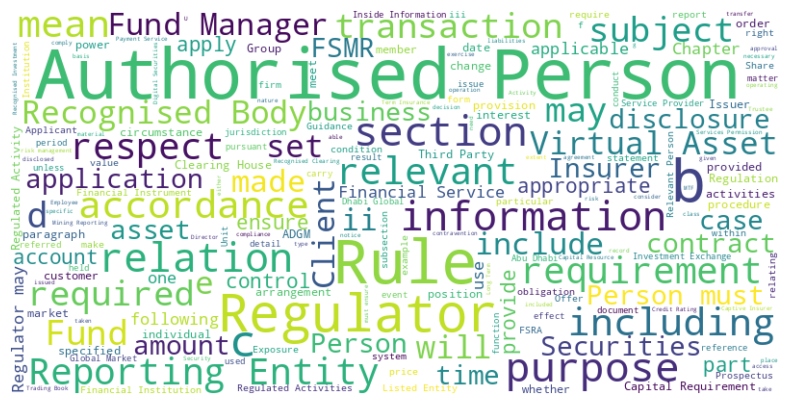

In [15]:
from wordcloud import WordCloud

# Combine all passages into a single string
text = " ".join(filtered_passages['Passage'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

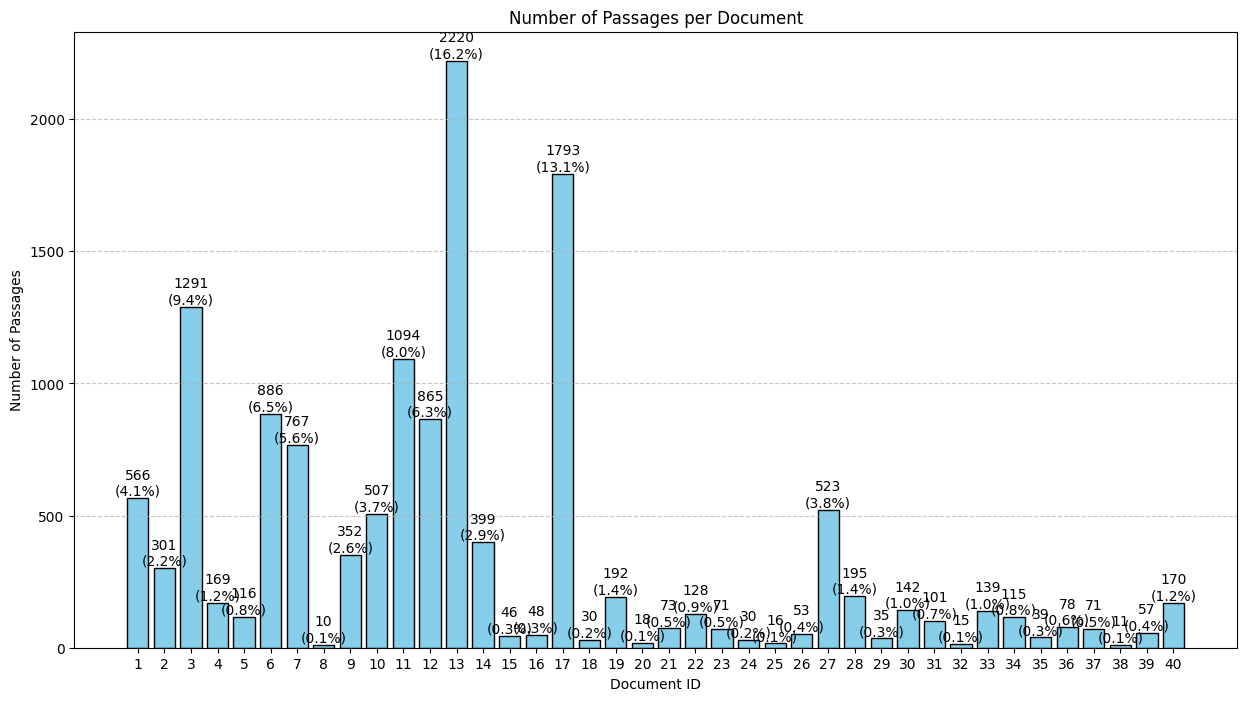

In [16]:
# Calculate the number of passages per document
num_passages_per_document = [len(doc) for doc in documents]

# Create a bar chart
document_ids = list(range(1,len(documents)+1))
plt.figure(figsize=(15, 8))
bars = plt.bar(document_ids, num_passages_per_document, color='skyblue', edgecolor='black')

# Add counts and percentages on top of the bars
total_count = sum(num_passages_per_document)
percentages = (np.array(num_passages_per_document) / total_count) * 100

for bar, count, percentage in zip(bars, num_passages_per_document, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{count}\n({percentage:.1f}%)', 
             ha='center', va='bottom')

plt.title('Number of Passages per Document')
plt.xlabel('Document ID')
plt.ylabel('Number of Passages')
plt.xticks(document_ids)  # Set x-ticks to show document IDs
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

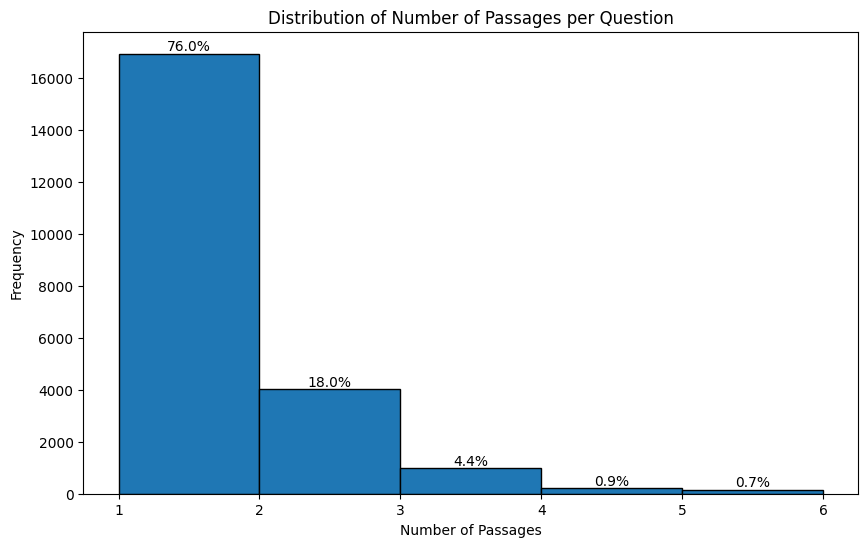

In [17]:
# Assuming 'questions' DataFrame has a column 'Passages' with lists of relevant passage IDs for each question
# Calculate the number of passages per question
questions_train['num_passages'] = questions_train['Passages'].apply(len)

# Plot the distribution of number of passages per question
plt.figure(figsize=(10, 6))
counts, bins, patches = plt.hist(questions_train['num_passages'], bins=range(1, questions_train['num_passages'].max() + 1), edgecolor='black', density=False)

# Calculate percentages
total_count = sum(counts)
percentages = (counts / total_count) * 100

# Add percentages on top of the bars
for count, x, percentage in zip(counts, bins[:-1], percentages):
    plt.text(x + 0.5, count, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribution of Number of Passages per Question')
plt.xlabel('Number of Passages')
plt.ylabel('Frequency')
plt.show()


## Prepare Data

### X data

In [18]:
# Cast the document_id and passage_id to the unique passage id
id_casting = {(row[1]['DocumentID'],row[1]['PassageID']) : row[1]['ID'] for row in passages.iterrows()}

In [19]:
question_texts, candidate_passages = questions_train['Question'], questions_train['Passages'].apply(lambda X: [id_casting[(x['DocumentID'],x['PassageID'])] for x in X])
question_texts,candidate_passages

(0        Under Rules 7.3.2 and 7.3.3, what are the two ...
 1        **Best Execution and Transaction Handling**: W...
 2        How does the FSRA define and evaluate "princip...
 3        How soon is the Registrar of Companies expecte...
 4        Can the ADGM provide examples of legal risks a...
                                ...                        
 22290    Can you provide guidance on how frequently upd...
 22291    What are the reporting requirements for Financ...
 22292    What are the penalties for non-compliance with...
 22293    If a communication references an investment th...
 22294    Are there any exemptions or special considerat...
 Name: Question, Length: 22295, dtype: object,
 0                   [33cf4590-6b60-4837-82ab-9970cd98b532]
 1                   [60f7507b-7582-4d9b-8e9c-1e5a8ceeaf5e]
 2                   [7a2d0ef0-9522-4b20-8c0f-f7451a823073]
 3                   [20d6f677-9f6a-4f73-8baf-3272d77b3390]
 4        [44596fcf-2964-420e-9150-6d5c98e22f61, 7195

In [20]:
passages_text = filtered_passages['Passage']
passages_text

0                                             INTRODUCTION
1                                             Jurisdiction
3        The AML Rulebook is made in recognition of the...
4        Nothing in the AML Rulebook affects the operat...
5                                              Application
                               ...                        
13727    The address of a Financial Institution with wh...
13728    An address that is provided subject to instruc...
13729    \nNON-REPORTING FINANCIAL INSTITUTIONS\nFor th...
13730    \nEXCLUDED ACCOUNTS\nFor the purposes of subpa...
13731    \nPARTICIPATING JURISDICTIONS\nFor the purpose...
Name: Passage, Length: 13040, dtype: object

### Add Passages as training data

In [21]:
candidate_passages4passages = filtered_passages['ID'].apply(lambda x: [x])
candidate_passages4passages

0        [bd35fb2d-4de6-48fb-ab3c-baead722854f]
1        [e563ad09-df80-435c-a497-eeec420efbc4]
3        [1389d0fa-5346-4953-8d52-45d7fd96c5e8]
4        [23368989-55c6-4940-abc6-d7a8d2d1071b]
5        [752659a9-d3f6-416f-ba24-64d290addf6e]
                          ...                  
13727    [b3229a88-88fa-43e6-912f-30fb5763d6f6]
13728    [1f312be6-0e89-490f-b9c3-6ce0e8ae3234]
13729    [029f87ab-4a4d-47af-9561-bc60ccff81b7]
13730    [1ca292b9-2154-49f5-bcf7-25e7a7898c4b]
13731    [8dd2b803-318b-4220-9971-96ce1c92cadd]
Name: ID, Length: 13040, dtype: object

In [22]:
# Combine questions_text and passages_text

combined_texts = pd.concat([question_texts, passages_text])
combined_candidates = pd.concat([candidate_passages,candidate_passages4passages])

# Create a new DataFrame with the combined texts and candidates
combined_df = pd.DataFrame({
    'CombinedText': combined_texts,
    'CombinedCandidates': combined_candidates
})

combined_df

,CombinedText,CombinedCandidates
0,"Under Rules 7.3.2 and 7.3.3, what are the two ...",[33cf4590-6b60-4837-82ab-9970cd98b532]
1,**Best Execution and Transaction Handling**: W...,[60f7507b-7582-4d9b-8e9c-1e5a8ceeaf5e]
2,"How does the FSRA define and evaluate ""princip...",[7a2d0ef0-9522-4b20-8c0f-f7451a823073]
3,How soon is the Registrar of Companies expecte...,[20d6f677-9f6a-4f73-8baf-3272d77b3390]
4,Can the ADGM provide examples of legal risks a...,"[44596fcf-2964-420e-9150-6d5c98e22f61, 7195176..."
...,...,...
13727,The address of a Financial Institution with wh...,[b3229a88-88fa-43e6-912f-30fb5763d6f6]
13728,An address that is provided subject to instruc...,[1f312be6-0e89-490f-b9c3-6ce0e8ae3234]
13729,\nNON-REPORTING FINANCIAL INSTITUTIONS\nFor th...,[029f87ab-4a4d-47af-9561-bc60ccff81b7]
13730,\nEXCLUDED ACCOUNTS\nFor the purposes of subpa...,[1ca292b9-2154-49f5-bcf7-25e7a7898c4b]


### Y data

In [23]:
# Create a mapping of ID to its index in the DataFrame
id_to_index = {row['ID']: index for index, row in passages.iterrows()}

# Replace IDs with their indexes
index_list = [[id_to_index[id_] for id_ in sublist] for sublist in combined_candidates]

len(index_list)

35335

In [24]:
labels_length = passages.shape[0]
# Create an array of zeros with shape (len(index_list), labels_length)
y_labels = np.zeros((len(index_list), labels_length), dtype=np.float32)

# Set the appropriate indices to 1
for i, t in enumerate(index_list):
    y_labels[i, t] = 1.0  # Use advanced indexing to set the one-hot indices

y_labels.shape


(35335, 13732)

In [25]:
from transformers import AutoTokenizer

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# Tokenize questions (no passage content included)
encodings = tokenizer(combined_texts.to_list(), truncation=True, padding=True, max_length=512, return_tensors="pt")


/home/estudiante/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/estudiante/venv/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [26]:
encodings['input_ids'].shape

torch.Size([35335, 512])

## Model

In [27]:
from transformers import AutoModelForSequenceClassification
import torch.nn as nn

# Load the RoBERTa model
class PassageClassificationModel(nn.Module):
    def __init__(self, base_model_name, num_labels):
        super(PassageClassificationModel, self).__init__()
        # Load RoBERTa model and attach classification head
        self.roberta = AutoModelForSequenceClassification.from_pretrained(base_model_name, num_labels=num_labels)
    
    def forward(self, input_ids, attention_mask):
        # Forward pass through RoBERTa
        outputs = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        return outputs.logits  # Return the logits for each candidate passage

# Instantiate the model
model = PassageClassificationModel(base_model_name="roberta-base", num_labels=labels_length)

# # Freeze the backbone layers
# for param in model.roberta.base_model.parameters():
#     param.requires_grad = False


# model.to(device)

model.to(device)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true 

PassageClassificationModel(
  (roberta): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 768, padding_idx=1)
        (position_embeddings): Embedding(514, 768, padding_idx=1)
        (token_type_embeddings): Embedding(1, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): RobertaEncoder(
        (layer): ModuleList(
          (0-11): 12 x RobertaLayer(
            (attention): RobertaAttention(
              (self): RobertaSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): RobertaSelfOutput(
          

### Train

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Define hyperparameters
learning_rate = 5e-2
epochs = 32

# Prepare DataLoader for training
train_dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(y_labels))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0
    
    for batch in tqdm(train_loader):
        # Move batch to GPU
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        optimizer.zero_grad()

        # Forward pass
        logits = model(input_ids=input_ids, attention_mask=attention_mask)
        # Since labels is a list of relevant passage indices, calculate cross-entropy for relevant passages
        loss = nn.CrossEntropyLoss()(logits, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

        del input_ids, attention_mask, labels, logits, loss

    print(f"Epoch {epoch + 1} Loss: {epoch_loss / len(train_loader)}")

print("Training complete!")


Epoch 1/32


  4%|███▏                                                                             | 44/1105 [00:31<12:29,  1.42it/s]

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

# Define hyperparameters
learning_rate = 5e-5
epochs = 5

# Prepare DataLoader for training
train_dataset = TensorDataset(encodings['input_ids'], encodings['attention_mask'], torch.tensor(y_labels))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

# Training loop
model.train()
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0
    
    for batch in tqdm(train_loader):
        # Move batch to GPU
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        optimizer.zero_grad()

        # Forward pass
        logits = model(input_ids=input_ids, attention_mask=attention_mask)
        # Since labels is a list of relevant passage indices, calculate cross-entropy for relevant passages
        loss = nn.CrossEntropyLoss()(logits, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()

    print(f"Epoch {epoch + 1} Loss: {epoch_loss / len(train_loader)}")

print("Training complete!")


Epoch 1/5


100%|█████████████████████████████████████████████████████████████████████████████████| 349/349 [00:34<00:00,  9.98it/s]


Epoch 1 Loss: 3.0074479361318245
Epoch 2/5


100%|█████████████████████████████████████████████████████████████████████████████████| 349/349 [00:35<00:00,  9.92it/s]


Epoch 2 Loss: 2.979056244934869
Epoch 3/5


100%|█████████████████████████████████████████████████████████████████████████████████| 349/349 [00:35<00:00,  9.87it/s]


Epoch 3 Loss: 2.965812662952609
Epoch 4/5


100%|█████████████████████████████████████████████████████████████████████████████████| 349/349 [00:35<00:00,  9.85it/s]


Epoch 4 Loss: 3.0144303948284903
Epoch 5/5


100%|█████████████████████████████████████████████████████████████████████████████████| 349/349 [00:35<00:00,  9.82it/s]

Epoch 5 Loss: 2.981913029293618
Training complete!


In [ ]:
from torch.nn.functional import softmax

def predict_most_relevant_passages(model, input_ids, attention_mask):
    model.eval()
    with torch.no_grad():
        logits = model(input_ids=input_ids, attention_mask=attention_mask).to(device)
        probabilities = softmax(logits, dim=1).to(device)
        
        # Get top passages by probability
        top_passages = torch.topk(probabilities, k=10, dim=1)  # k=3 to get top 3 relevant passages
        return top_passages

# Example of running inference
sample_input_ids = (encodings['input_ids'][:4]).to(device)  # Select a single question for demonstration
sample_attention_mask = (encodings['attention_mask'][:4]).to(device)
top_passages = predict_most_relevant_passages(model, sample_input_ids, sample_attention_mask)

print("Top passages indices:", top_passages.indices)
print("Top passages probabilities:", top_passages.values)
print("Real",index_list[:4] )

Top passages indices: tensor([[ 6668,  8317,  7630,  7648,  8284, 12065,  8632, 12288,  6440,  7568],
        [ 2149,  3152,  3151,  3098,  3150,  3145,  3097,  3092,  3089,  3223],
        [ 6881,   931,  6863,   856, 10623, 13702,   934,   907,   929,  7250],
        [ 5082,  7937,  8422,  8724,  9462,  2890,  2952,  5056, 12049,  5881]],
       device='cuda:0')
Top passages probabilities: tensor([[9.6093e-01, 7.6846e-03, 2.1336e-03, 1.7396e-03, 9.6454e-04, 8.9994e-04,
         7.5155e-04, 6.5341e-04, 6.1364e-04, 5.1972e-04],
        [4.3120e-01, 1.0457e-01, 8.4363e-02, 5.0489e-02, 2.8974e-02, 2.5753e-02,
         1.5367e-02, 1.3550e-02, 1.1972e-02, 1.0670e-02],
        [6.2396e-01, 3.5016e-02, 2.6633e-02, 2.5871e-02, 2.2057e-02, 1.9756e-02,
         1.8498e-02, 1.0201e-02, 9.5749e-03, 8.3666e-03],
        [9.9930e-01, 5.9471e-05, 3.0233e-05, 1.6208e-05, 1.4875e-05, 1.3049e-05,
         1.2806e-05, 1.2076e-05, 1.1858e-05, 1.0517e-05]], device='cuda:0')
Real [[6668], [2149], [6881], [

In [ ]:
def get_ids_prediction(tensor_id):
    rows = passages.iloc[tensor_id.tolist()]['ID']
    return rows.tolist()
    
get_ids_prediction(top_passages.indices[0])

['33cf4590-6b60-4837-82ab-9970cd98b532',
 '2c849a7d-71bb-4e57-acc5-fa50870faadf',
 'ca8c27e6-45d0-474e-81f2-7be99e1e2a7f',
 '6d14e349-126c-4e96-9300-a68db79c9f51',
 'e0989104-fb19-4679-af83-f56a03c214d1',
 '634d7695-6188-4cdb-bdd8-bc789adba744',
 'e4b331b0-8437-43a6-8fa7-a77f476e8c3a',
 '9ae2763f-2e1a-4afb-ac8e-f57ce03a81c3',
 '03332841-015a-4097-96b5-05bdbb18df46',
 'ccca73b2-b4fe-4321-abf1-71664331cfa9']

## Evaluate

In [ ]:
queries_test = pd.read_json('data/ObliQA_test.json')

In [ ]:
queries_test_text = queries_test['Question']
queries_test_text

0       Can the ADGM provide clarity on the level of d...
1       Are there any exceptions or specific circumsta...
2       What type of procedures must a Third Party Pro...
3       Are there any exceptions or specific circumsta...
4       What specific areas of inventory and delivery ...
                              ...                        
2781    Your petroleum reporting entity is finalizing ...
2782    Can the regulatory authority provide guidance ...
2783    What should the detailed limit structure for a...
2784    In cases where an Authorised Person's internal...
2785    Can you elucidate the extent to which sharehol...
Name: Question, Length: 2786, dtype: object

In [ ]:
encodgins_texts =tokenizer(queries_test_text.to_list(), truncation=True, padding=True, max_length=512, return_tensors="pt")
encodgins_texts

{'input_ids': tensor([[    0, 10836,     5,  ...,     1,     1,     1],
        [    0, 13755,    89,  ...,     1,     1,     1],
        [    0,  2264,  1907,  ...,     1,     1,     1],
        ...,
        [    0,  2264,   197,  ...,     1,     1,     1],
        [    0,  1121,  1200,  ...,  1421,   116,     2],
        [    0, 10836,    47,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [ ]:
# Example of running inference
sample_input_ids = (encodgins_texts['input_ids']).to(device)  # Select a single question for demonstration
sample_attention_mask = (encodgins_texts['attention_mask']).to(device)
top_passages = predict_most_relevant_passages(model, sample_input_ids, sample_attention_mask)

top_passages.indices.shape

torch.Size([2786, 10])

In [ ]:
responses_test = []
for res in  top_passages.indices:
    responses_test.append(get_ids_prediction(res))
np.array(responses_test)

array([['cbe01c7d-746e-4822-a789-e69e97077ff9',
        'f83eda81-a606-4aa1-9495-058ae80e99eb',
        '7c18c8ad-e66b-46ca-923b-f53b0bccc07a', ...,
        '91cd8922-2b83-43f1-b258-40ea02eecce8',
        'b9f65561-7dfe-40d3-943c-daea6166c730',
        '58785c72-44fa-4f27-9c55-3f4350d46cc3'],
       ['ac4da47e-f5d2-4ad6-8762-ac18e3eaf07a',
        '8d455e1a-f4dd-43a6-b56d-be9f3b80d7a1',
        '3a1b6f65-bf51-4f78-840e-f64d67f67a52', ...,
        '4848aefa-a67d-4205-9963-ea6d4d566320',
        '5fb34266-20be-42a7-b9d4-c036782e4e6b',
        'd1489d36-75b2-4b40-a824-cd34049dd838'],
       ['6f9fd9b9-7cd4-481e-a437-779c0c4b5d60',
        '4ddb2ccf-d881-4084-841f-0613d60d7c29',
        'a5118140-500d-49f4-85a9-6a18ef85d7f2', ...,
        '06936741-ee7c-4307-b4eb-c86c1a6f83af',
        '114a4fc2-0d23-4f0d-a965-898ddc3b2758',
        '12619665-a492-483a-a0f7-0a4eb1dd8dd4'],
       ...,
       ['50a52598-c4d3-45d5-9eab-ea3c009fb2c2',
        'b59edf5d-77de-4507-b5ea-455fd8e32ead',
        '5

In [ ]:
with open("rankings.trec", "w") as f:
  for i,query_id in enumerate(queries_test['QuestionID']):
    for j,passage_id in enumerate(responses_test[i]):
      line = f"{query_id} 0 {passage_id} {j+1} {777} bm25"
      f.write(line + "\n")

In [ ]:
# !git clone https://github.com/usnistgov/trec_eval.git && cd trec_eval && make
# !trec_eval/trec_eval -m recall.10 -m map_cut.10 ./qrels ./rankings.trec

In [ ]:
# 1. Save the entire model
torch.save(model, 'model_full2.pth')

## Base Line

In [ ]:
# # %git clone https://github.com/RegNLP/ObliQADataset.git
# %pip install faiss-cpu pyserini==0.22.1
# %wget https://gist.githubusercontent.com/kwang2049/63ed76eb0f4d79ca81caecdb06897bfb/raw/1d86978275d666dff904fba65a34ce3e71b3cf1d/bm25.py

In [ ]:
import os
import json
from typing import Dict

def load_qrels(docs_dir: str, fqrels: str) -> Dict[str, Dict[str, int]]:
    ndocs = 40
    docs = []
    for i in range(1, ndocs + 1):
        with open(os.path.join(docs_dir, f"{i}.json")) as f:
            doc = json.load(f)
            docs.append(doc)

    did2pid2id: Dict[str, Dict[str, str]] = {}
    for doc in docs:
        for psg in doc:
            did2pid2id.setdefault(psg["DocumentID"], {})
            assert psg["ID"] not in did2pid2id[psg["DocumentID"]]
            did2pid2id[psg["DocumentID"]].setdefault(psg["PassageID"], psg["ID"])

    with open(fqrels) as f:
        data = json.load(f)
    qrels = {}
    for e in data:
        qid = e["QuestionID"]
        for psg in e["Passages"]:
            qrels.setdefault(qid, {})
            pid = did2pid2id[psg["DocumentID"]][psg["PassageID"]]
            qrels[qid][pid] = 1
    return qrels

In [ ]:
qrels = load_qrels("data/StructuredRegulatoryDocuments", "data/ObliQA_test.json")
with open("qrels", "w") as f:
    for qid, rels in qrels.items():
        for pid, rel in rels.items():
            line = f"{qid} Q0 {pid} {rel}"
            f.write(line + "\n")

In [ ]:
from bm25 import BM25, Document, Query

bm25 = BM25()
ndocs = 40
collection = []
for i in range(1, ndocs + 1):
    with open(os.path.join("data/StructuredRegulatoryDocuments", f"{i}.json")) as f:
        doc = json.load(f)
        for psg in doc:
          collection.append(Document(psg["ID"], "", psg["PassageID"] + " " + psg["Passage"]))
bm25.index(iter(collection), len(collection), "./index")

In [ ]:
queries = []
with open("ObliQADataset/ObliQA_test.json") as f:
    data = json.load(f)
    for e in data:
      queries.append(Query(e["QuestionID"], e["Question"]))
retrieved = bm25.search(
    queries=queries,
    index_path="./index",
    topk=10,
    batch_size=1,
)
with open("rankings.trec", "w") as f:
  for qid, hits in retrieved.items():
    for i, hit in enumerate(sorted(hits, key=lambda hit:hit.score, reverse=True)):
      line = f"{qid} 0 {hit.docid} {i+1} {hit.score} bm25"
      f.write(line + "\n")